## Note to Dr. Yeo and Ms. Lee: I tried to complete both Case Studies (with the exception of the bonuses as of 09 September). Kindly scroll through and would love to get your comments. Thanks!


<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [368]:
import numpy as np

movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

movies_copy = movies.copy()
movies_copy.actors_list[0]

movies_copy['actors_list'][0][0]

'['

#### Check the number of rows and columns.

In [16]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [17]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [20]:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [22]:
movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

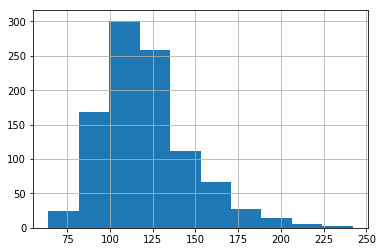

In [21]:
movies.duration.hist()

#### Use a box plot to display that same data.

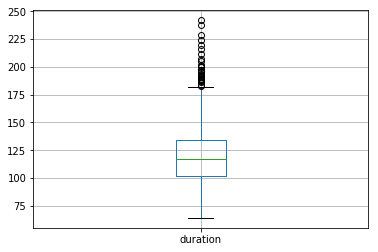

In [23]:
movies.boxplot('duration')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [25]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5,1,'Number of Movies per Content Rating')

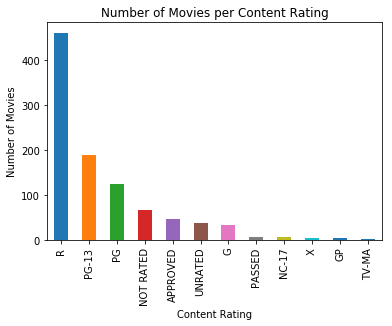

In [29]:
movies.content_rating.value_counts().plot(kind='bar')
plt.xlabel('Content Rating')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Content Rating')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

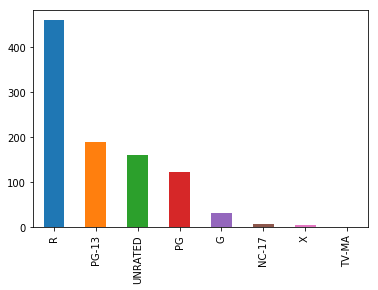

In [34]:
movies.content_rating.replace("NOT RATED", "UNRATED", inplace=True)
movies.content_rating.replace("APPROVED", "UNRATED", inplace=True)
movies.content_rating.replace("PASSED", "UNRATED", inplace=True)
movies.content_rating.replace("GP", "UNRATED", inplace=True)
#movies.content_rating.value_counts().plot(kind='bar')

#### Convert the following content ratings to "NC-17": X, TV-MA.

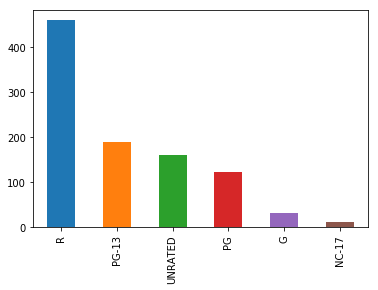

In [35]:
movies.content_rating.replace("X", "NC-17", inplace=True)
movies.content_rating.replace("TV-MA", "NC-17", inplace=True)
#movies.content_rating.value_counts().plot(kind='bar')

#### Count the number of missing values in each column.

In [37]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [38]:
movies.content_rating.fillna(value='UNRATED', inplace=True)

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [47]:
print(movies[movies.duration >= 120].star_rating.mean())
print(movies[movies.duration < 120].star_rating.mean())

7.948898678414082
7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

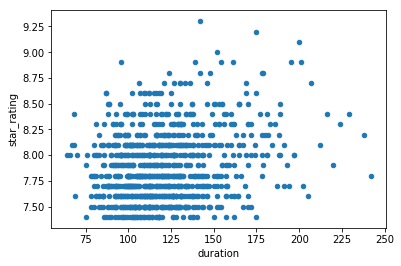

In [122]:
movies.plot(kind='scatter', x='duration', y='star_rating')

#### Calculate the average duration for each genre.

In [61]:
movies.groupby("genre").duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1185d9940>,
      dtype=object)

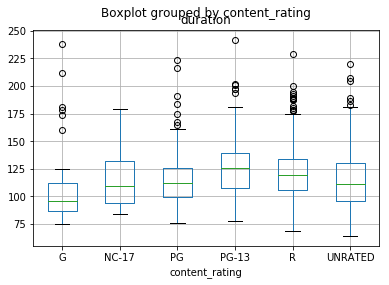

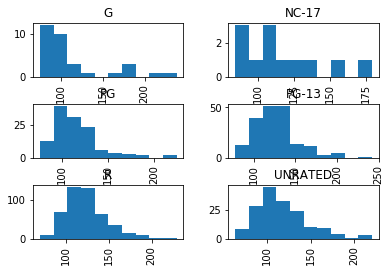

In [149]:
movies.boxplot(column="duration", by="content_rating")
movies.hist(column="duration", by="content_rating")

#### Determine the top rated movie (by star rating) for each genre.

In [144]:
#First part, able to sort the dataframe with star_rating from highest to lowest
#movies.sort_values("star_rating", ascending=False)

#Second part, grouping with genre and getting the max since star_rating is a float

movies.sort_values("star_rating", ascending=False).groupby("genre").max().title

genre
Action                                   Yojimbo
Adventure                              True Grit
Animation                         Wreck-It Ralph
Biography                          Walk the Line
Comedy                                Zombieland
Crime                                     Zodiac
Drama                                       Zulu
Family       Willy Wonka & the Chocolate Factory
Fantasy                The City of Lost Children
Film-Noir                          The Third Man
History                      Battleship Potemkin
Horror                                     [Rec]
Mystery                                  Vertigo
Sci-Fi             The Day the Earth Stood Still
Thriller               The Man Who Knew Too Much
Western                               Unforgiven
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [156]:
# detecting duplicate rows
movies.title.duplicated()          # True if a row is identical to a previous row
movies.title.duplicated().sum()    # count of duplicates
movies[movies.title.duplicated()]   # only show duplicates
#movies.duplicated(['title', 'genre', 'actors_list']).sum()   # specify columns for finding duplicates

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


In [188]:
movies.genre.value_counts() > 10

Drama         True
Comedy        True
Action        True
Crime         True
Biography     True
Adventure     True
Animation     True
Horror        True
Mystery       True
Western      False
Thriller     False
Sci-Fi       False
Film-Noir    False
Family       False
Fantasy      False
History      False
Name: genre, dtype: bool

#### Option 1: manually create a list of relevant genres, then filter using that list

In [200]:
relevant_genres = ["Action","Biography","Comedy","Drama","Family"]
movies[movies.genre.isin(relevant_genres)].groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]

genre
Action       7.884559
Biography    7.862338
Comedy       7.822436
Drama        7.902518
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [201]:
genre_counts = movies.genre.value_counts()
relevant_genres = genre_counts[genre_counts >= 10].index
movies[movies.genre.isin(relevant_genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [202]:
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [204]:
genre_count_mean = movies.groupby('genre').star_rating.agg(['count', 'mean'])
genre_count_mean[genre_count_mean['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [347]:
top_genre = movies.sort_values("star_rating", ascending=False).groupby("genre").max().actors_list


genre
Action       [u'Ziyi Zhang', u'Takeshi Kaneshiro', u'Andy L...
Adventure    [u'Yves Montand', u'Charles Vanel', u'Peter va...
Animation    [u'Y\xf4ji Matsuda', u'Yuriko Ishida', u'Y\xfb...
Biography    [u'Will Smith', u'Thandie Newton', u'Jaden Smi...
Comedy       [u'Zooey Deschanel', u'Joseph Gordon-Levitt', ...
Crime        [u'Yeong-ae Lee', u'Min-sik Choi', u'Shi-hoo K...
Drama        [u'William Holden', u'Gloria Swanson', u'Erich...
Family       [u'Henry Thomas', u'Drew Barrymore', u'Peter C...
Fantasy      [u'Ron Perlman', u'Daniel Emilfork', u'Judith ...
Film-Noir    [u'Orson Welles', u'Joseph Cotten', u'Alida Va...
History      [u'Aleksandr Antonov', u'Vladimir Barsky', u'G...
Horror       [u'Simone Signoret', u'V\xe9ra Clouzot', u'Pau...
Mystery      [u'Rufus Sewell', u'Kiefer Sutherland', u'Jenn...
Sci-Fi       [u'Sandra Bullock', u'George Clooney', u'Ed Ha...
Thriller     [u'Teresa Wright', u'Joseph Cotten', u'Macdona...
Western       [u'John Wayne', u'Dean Martin', u'R

'Z'

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing Chipotle Data

_Author: Joseph Nelson (DC)_

---

For Project 2, you will complete a series of exercises exploring [order data from Chipotle](https://github.com/TheUpshot/chipotle), compliments of _The New York Times'_ "The Upshot."

For these exercises, you will conduct basic exploratory data analysis (Pandas not required) to understand the essentials of Chipotle's order data: how many orders are being made, the average price per order, how many different ingredients are used, etc. These allow you to practice business analysis skills while also becoming comfortable with Python.

---

## Basic Level

### Part 1: Read in the file with `csv.reader()` and store it in an object called `file_nested_list`.

Hint: This is a TSV (tab-separated value) file, and `csv.reader()` needs to be told [how to handle it](https://docs.python.org/2/library/csv.html).

In [52]:
import csv
from collections import namedtuple   # Convenient to store the data rows

DATA_FILE = './data/chipotle.tsv'

files_nested_list = []

with open(DATA_FILE, 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        files_nested_list.append(row)
f.close()

In [131]:
#import pandas as pd
#df = DataFrame.from_csv(DATA_FILE, sep="\t")
#print(df)

### Part 2: Separate `file_nested_list` into the `header` and the `data`.


In [44]:
header = files_nested_list[0]
print(header)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [34]:
data = files_nested_list[1:]

---

## Intermediate Level

### Part 3: Calculate the average price of an order.

Hint: Examine the data to see if the `quantity` column is relevant to this calculation.

Hint: Think carefully about the simplest way to do this!

In [133]:
print(data[0:20])
#item_price is already considers the quantity based on the 'Chicken Bowl' which is the 5th and 6th rows

[['1', '1', 'Chips and Fresh Tomato Salsa', 'NULL', '$2.39 '], ['1', '1', 'Izze', '[Clementine]', '$3.39 '], ['1', '1', 'Nantucket Nectar', '[Apple]', '$3.39 '], ['1', '1', 'Chips and Tomatillo-Green Chili Salsa', 'NULL', '$2.39 '], ['2', '2', 'Chicken Bowl', '[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]', '$16.98 '], ['3', '1', 'Chicken Bowl', '[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]', '$10.98 '], ['3', '1', 'Side of Chips', 'NULL', '$1.69 '], ['4', '1', 'Steak Burrito', '[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]]', '$11.75 '], ['4', '1', 'Steak Soft Tacos', '[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]', '$9.25 '], ['5', '1', 'Steak Burrito', '[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]', '$9.25 '], ['5', '1', 'Chips and Guacamole', 'NULL', '$4.45 '], ['6', '1', 'Chicken Crispy Ta

In [74]:
price = [row[4] for row in data]
# sum(price) but returns TypeError, need to drop $ and change to float
price = [row[4].replace('$', '') for row in data]
price = [float(row[4][1:]) for row in data]

# check if type is now float
print(type(price[0]))

<class 'float'>


34500.16000000046

In [83]:
print(data[-1])
#Last order number is 1834

['1834', '1', 'Chicken Salad Bowl', '[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Lettuce]]', '$8.75 ']


In [110]:
#now take the sum and divide by last order for the average
round(sum(price)/1834,2)

18.81

In [132]:
#df.item_price=df.item_price.apply(lambda x:str(x).replace('$',''))
#df.item_price=pd.to_numeric(df.item_price)
#df.item_price.sum()

### Part 4: Create a list (or set) named `unique_sodas` containing all of unique sodas and soft drinks that Chipotle sells.

Note: Just look for `'Canned Soda'` and `'Canned Soft Drink'`, and ignore other drinks like `'Izze'`.

In [143]:
soda_drinks = []

for row in data:
    if 'Canned' in row[2]:
        soda_drinks.append(row[3])

unique_sodas=set(soda_drinks)
print(unique_sodas)

{'[Coke]', '[Sprite]', '[Coca Cola]', '[Diet Coke]', '[Dr. Pepper]', '[Diet Dr. Pepper]', '[Nestea]', '[Mountain Dew]', '[Lemonade]'}


---

## Advanced Level


### Part 5: Calculate the average number of toppings per burrito.

Note: Let's ignore the `quantity` column to simplify this task.

Hint: Think carefully about the easiest way to count the number of toppings!


In [153]:
burrito = []

burrito_count = 0
topping_count = 0

for row in data:
    if 'Burrito' in row[2]:
        burrito.append(row[3])
        burrito_count+= 1
        topping_count+= (row[3].count(','))

average_toppings=round(topping_count/burrito_count,0)

print('Total Toppings: ' + str(topping_count))
print('Total Burritos: ' + str(burrito_count))
print('Average Toppings: ' + str(average_toppings))

Total Toppings: 5151
Total Burritos: 1172
Average Toppings: 4.0


### Part 6: Create a dictionary. Let the keys represent chip orders and the values represent the total number of orders.

Expected output: `{'Chips and Roasted Chili-Corn Salsa': 18, ... }`

Note: Please take the `quantity` column into account!

Optional: Learn how to use `.defaultdict()` to simplify your code.

In [155]:
from collections import defaultdict
chips_dict = defaultdict(int)

for row in data:
    if 'Chips' in row[2]:
        chips_dict[row[2]]+=int(row[1])

print(chips_dict)

defaultdict(<class 'int'>, {'Chips and Fresh Tomato Salsa': 130, 'Chips and Tomatillo-Green Chili Salsa': 33, 'Side of Chips': 110, 'Chips and Guacamole': 506, 'Chips and Tomatillo Green Chili Salsa': 45, 'Chips': 230, 'Chips and Tomatillo Red Chili Salsa': 50, 'Chips and Roasted Chili-Corn Salsa': 18, 'Chips and Roasted Chili Corn Salsa': 23, 'Chips and Tomatillo-Red Chili Salsa': 25, 'Chips and Mild Fresh Tomato Salsa': 1})
